In [2]:
%install_ext https://raw.githubusercontent.com/szeitlin/watermark/master/watermark.py

Installed watermark.py. To use it, type:
  %load_ext watermark


In [3]:
%load_ext watermark

In [5]:
%watermark -a "Samantha Zeitlin" -d -u -p ipython,pandas,seaborn,pytz,matplotlib

Samantha Zeitlin 
Last updated: 04/14/2015 

ipython 3.1.0
pandas 0.15.2
seaborn 0.5.1
pytz 2014.9
matplotlib 1.4.3


In [36]:
import pandas
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.dates import AutoDateFormatter as dateformatter
import seaborn as sns
import numpy as np
import datetime

%matplotlib inline

In [7]:
df = pandas.read_csv("2014_ts.csv",index_col=0)

In [8]:
df.head()

,posTime,Lat,Long,altTime,Altitude,DistanceMeters,weekday
0,2014-10-16 07:48:11-07:00,37.3943,-122.0769,2014-10-16 07:48:11-07:00,19.3638,4780.8071,3
1,2014-10-16 07:48:12-07:00,37.3943,-122.0771,2014-10-16 07:48:12-07:00,19.3638,4791.6362,3
2,2014-10-16 07:48:17-07:00,37.3944,-122.0774,2014-10-16 07:48:17-07:00,19.8444,4826.5288,3
3,2014-10-16 07:48:26-07:00,37.3947,-122.0781,2014-10-16 07:48:26-07:00,19.8444,4895.5474,3
4,2014-10-16 07:48:29-07:00,37.3948,-122.0782,2014-10-16 07:48:29-07:00,19.8444,4916.4795,3


In [23]:
df.shape

(12287, 7)

In [9]:
sorted_by_date = df.sort_index(by='posTime')
sorted_by_date['posTime'] = sorted_by_date['posTime'].apply(pandas.to_datetime)

In [10]:
positioned = sorted_by_date.set_index('posTime')

In [53]:
type(positioned.index)
positioned.index = positioned.index.to_pydatetime()

In [28]:
#to use googlemaps RoadsAPI and ElevationAPI, will want a list of snappedPoints, where each point has a location (tuple of lat and long)

In [11]:
positioned.head()

,Lat,Long,altTime,Altitude,DistanceMeters,weekday
posTime,,,,,,
2014-06-18 13:38:14,37.7643,-122.4334,2014-06-18 06:38:14-07:00,40.5128,0.0000,2
2014-06-18 13:38:14,37.7643,-122.4334,2014-06-18 06:38:14-07:00,40.5128,0.0000,2
2014-06-18 13:38:15,37.7643,-122.4334,2014-06-18 06:38:15-07:00,39.5513,0.0000,2
2014-06-18 13:38:15,37.7643,-122.4334,2014-06-18 06:38:15-07:00,39.5513,0.0000,2
2014-06-18 14:46:29,37.3943,-122.0771,2014-06-18 07:46:29-07:00,21.7670,4744.3589,2


In [96]:
altplot = positioned[['altTime', 'Altitude','DistanceMeters']]
altplot['datetimes']=pandas.to_datetime(altplot.altTime)
type(altplot.datetimes[0])
altplot['dated']=altplot.datetimes.map(lambda t: t.strftime('%d-%m'))

/Users/szeitlin/anaconda/envs/DanekBike/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/szeitlin/anaconda/envs/DanekBike/lib/python3.4/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [75]:
altplot.dated[0]

'18-06'

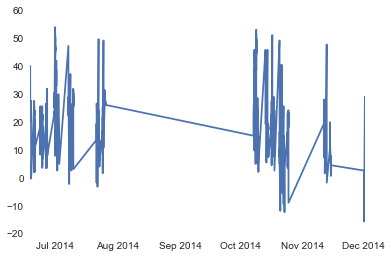

In [97]:
#probably want to split up dataframe into days and possibly legs
#ax = sns.tsplot(altplot['Altitude'])

#ticker = np.array(altplot['datetimes'])
#altplot.index = ticker
#sns.tsplot(altplot, "dated", "Altitude") #this still doesn't work 

#I think the axes have to be np.arrays for matplotlib to use them
#test this theory with irrelevant ints
#test_ticks = range(len(altplot['dated']))
#ticker = np.array(test_ticks)

ticker = np.array(altplot['datetimes'])
plt.plot(ticker,altplot['Altitude'])




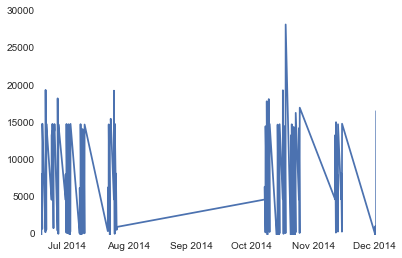

In [98]:
plt.plot(ticker,altplot['DistanceMeters'])

In [115]:
df = df.sort_index(by='posTime')
df['datetimes']=pandas.to_datetime(df.altTime)
ticker = np.array(df['datetimes'])
weekday_0 = df[df['weekday']==0]
weekday_1 = df[df['weekday']==1]
weekday_2 = df[df['weekday']==2]
weekday_3 = df[df['weekday']==3]
weekday_4 = df[df['weekday']==4]

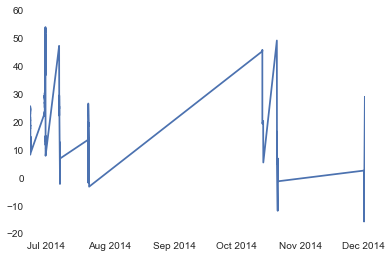

In [116]:
plt.plot(weekday_0['datetimes'],weekday_0['Altitude'])

(0, 18000)

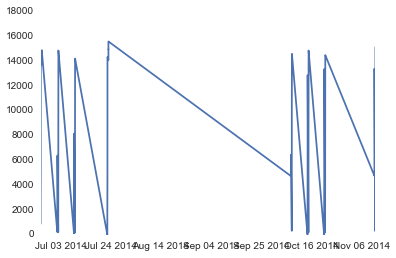

In [128]:
plt.plot(weekday_1['datetimes'],weekday_1['DistanceMeters'])
plt.ylim(0,18000)

(0, 18000)

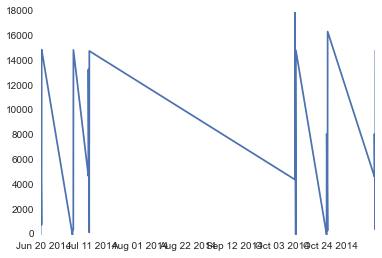

In [129]:
plt.plot(weekday_2['datetimes'],weekday_2['DistanceMeters'])
plt.ylim(0,18000)

In [130]:
#looks like distances are more consistent than altitudes (don't know why altitudes are so noisy??)